## Projeto TCC de formação no MBA em Data Science e Analytics de 2024
### Tema: Comparativo do Valor Médio do Bolsa Família em Brasília, Fortaleza e São Paulo
### Universidade de São Paulo -  USP/Esalq
### Formando: João Victor Lemos da Silva

O presente estudo tem como objetivo principal comparar o valor médio do benefício do Bolsa Família nas cidades de São Paulo, Brasília e Fortaleza, após a correção dos valores pelo Índice Nacional de Preços ao Consumidor (INPC) de cada localidade. Essa análise busca verificar se o valor do benefício atende às demandas específicas de cada cidade, considerando suas particularidades socioeconômicas.

Para alcançar este objetivo, optou-se por utilizar a Análise de Variância (ANOVA) como ferramenta estatística. A ANOVA é uma técnica ideal para este tipo de análise por diversos motivos:

Comparação de múltiplas médias: A ANOVA permite comparar as médias de três ou mais grupos, no caso, as médias dos valores do Bolsa Família nas três cidades estudadas.
Identificação de diferenças significativas: A ANOVA possibilita identificar se as diferenças observadas entre as médias são estatisticamente significativas, ou seja, se são grandes demais para serem atribuídas apenas ao acaso.

Robustez: A ANOVA é uma técnica robusta e amplamente utilizada em diversas áreas, como economia, sociologia e ciências sociais em geral.
Adequação aos dados: A natureza dos dados coletados, que envolvem a comparação de médias de diferentes grupos, torna a ANOVA a ferramenta estatística mais apropriada para responder à pergunta de pesquisa.

Ao aplicar a ANOVA aos dados coletados, será possível determinar se existe uma diferença significativa entre os valores médios do Bolsa Família nas três cidades, após a correção pelo INPC. Caso seja encontrada uma diferença significativa, a ANOVA permitirá identificar quais cidades apresentam valores médios superiores ou inferiores, auxiliando na compreensão das disparidades regionais no valor do benefício e na avaliação da adequação do programa às necessidades de cada localidade.



In [19]:
#Pacotes
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
#Dados do projeto
data = {
    'Cidade': ['Brasília'] * 10 + ['Fortaleza'] * 10 + ['São Paulo'] * 10,
    'Mês': ['Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro'] * 3,
    'Valor_Medio': [
        685.56, 685.22, 686.53, 721.47, 695.09, 694.75, 697.69, 698.51, 686.11, 686.27,  # Brasília
        654.58, 654.38, 656.45, 680.43, 663.80, 662.92, 664.37, 668.24, 665.47, 670.35,  # Fortaleza
        670.85, 670.88, 674.46, 702.80, 678.75, 677.92, 679.23, 681.65, 671.07, 673.91   # São Paulo
    ],
    'INPC': [
        0.24, 2.39, 0.42, 2.68, -0.68, -1.09, 2.50, 0.35, 4.13, 0.25,  # Brasília
        2.03, 0.57, 1.15, -2.40, -4.17, 0.10, 7.38, -1.33, 0.18, 0.40,  # Fortaleza
        1.67, 0.89, 1.38, -4.33, -0.32, -1.56, 1.38, 0.57, 1.35, 0.36   # São Paulo
    ],
    'Valor_Corrigido': [
        687.24, 701.61, 689.40, 740.83, 690.34, 687.17, 715.13, 700.99, 714.47, 687.96,  # Brasília
        667.84, 658.08, 664.00, 664.10, 636.14, 663.59, 713.37, 659.33, 664.26, 673.02,  # Fortaleza
        682.03, 676.84, 683.80, 672.35, 680.93, 667.37, 688.63, 685.50, 680.15, 676.35  # São Paulo
    ]
}

# Criar DataFrame
df = pd.DataFrame(data)


In [23]:
# Estatísticas Descritivas
estatisticas_descritivas = df.groupby('Cidade').describe()
# Resultados Estatísticos Tabelados:
print("Estatísticas Descritivas:")
display(estatisticas_descritivas)

Estatísticas Descritivas:


Valor_Medio                                                 \
                count     mean        std     min       25%      50%   
Cidade                                                                 
Brasília         10.0  693.720  11.133790  685.22  686.1500  690.640   
Fortaleza        10.0  664.099   7.957767  654.38  658.0675  664.085   
São Paulo        10.0  678.152   9.482819  670.85  671.7800  676.190   

                             INPC         ...               Valor_Corrigido  \
                75%     max count   mean  ...     75%   max           count   
Cidade                                    ...                                 
Brasília   697.0400  721.47  10.0  1.119  ...  2.4725  4.13            10.0   
Fortaleza  667.5475  680.43  10.0  0.391  ...  1.0050  7.38            10.0   
São Paulo  679.1100  702.80  10.0  0.139  ...  1.3725  1.67            10.0   

                                                                            
              mean        std     min       25%      50%       75%     max  
Cidade                                                                      
Brasília   701.514  17.524905  687.17  688.3200  695.665  711.2550  740.83  
Fortaleza  666.373  19.178901  636.14  660.3950  664.050  666.9450  713.37  
São Paulo  679.395   6.340894  667.37  676.4725  680.540  683.3575  688.63  

[3 rows x 24 columns]

In [24]:
# ANOVA para os valores médios entre as cidades
anova_valores = stats.f_oneway(
    df[df['Cidade'] == 'Brasília']['Valor_Medio'],
    df[df['Cidade'] == 'Fortaleza']['Valor_Medio'],
    df[df['Cidade'] == 'São Paulo']['Valor_Medio']
)

# ANOVA para o INPC entre as cidades
anova_inpc = stats.f_oneway(
    df[df['Cidade'] == 'Brasília']['INPC'],
    df[df['Cidade'] == 'Fortaleza']['INPC'],
    df[df['Cidade'] == 'São Paulo']['INPC']
)

# ANOVA para os valores corrigidos entre as cidades
anova_valores_corrigidos = stats.f_oneway(
    df[df['Cidade'] == 'Brasília']['Valor_Corrigido'],
    df[df['Cidade'] == 'Fortaleza']['Valor_Corrigido'],
    df[df['Cidade'] == 'São Paulo']['Valor_Corrigido']
)

print("\nResultado da ANOVA para Valores Médios:")
print(f'Estatística F: {anova_valores.statistic:.4f}')
print(f'p-valor: {anova_valores.pvalue:.4e}')

print("\nResultado da ANOVA para INPC:")
print(f'Estatística F: {anova_inpc.statistic:.4f}')
print(f'p-valor: {anova_inpc.pvalue:.4e}')

print("\nResultado da ANOVA para Valores Corrigidos:")
print(f'Estatística F: {anova_valores_corrigidos.statistic:.4f}')
print(f'p-valor: {anova_valores_corrigidos.pvalue:.4e}')


Resultado da ANOVA para Valores Médios:
Estatística F: 23.7590
p-valor: 1.1166e-06

Resultado da ANOVA para INPC:
Estatística F: 0.4983
p-valor: 6.1305e-01

Resultado da ANOVA para Valores Corrigidos:
Estatística F: 13.2398
p-valor: 9.8372e-05


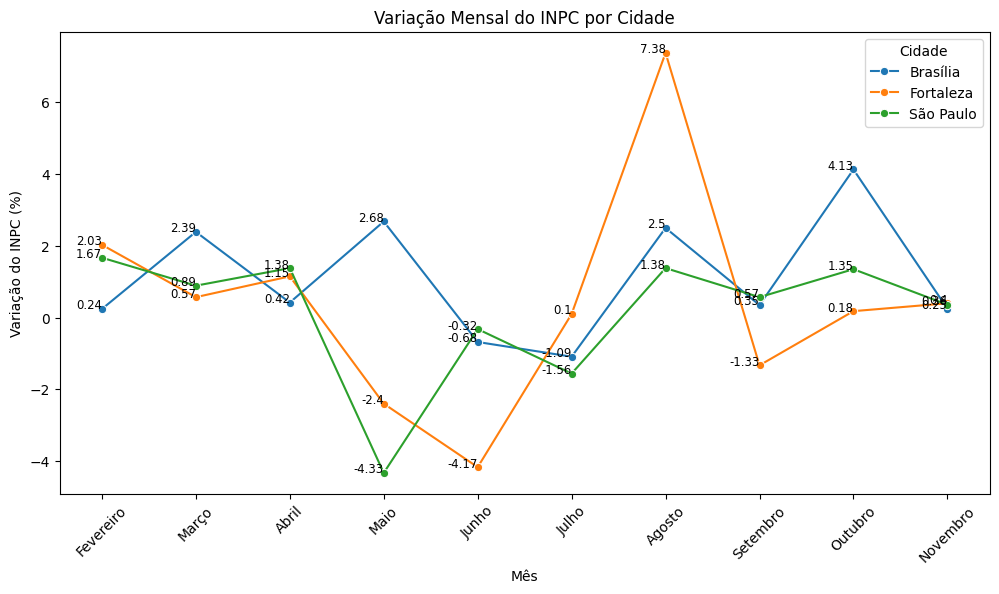

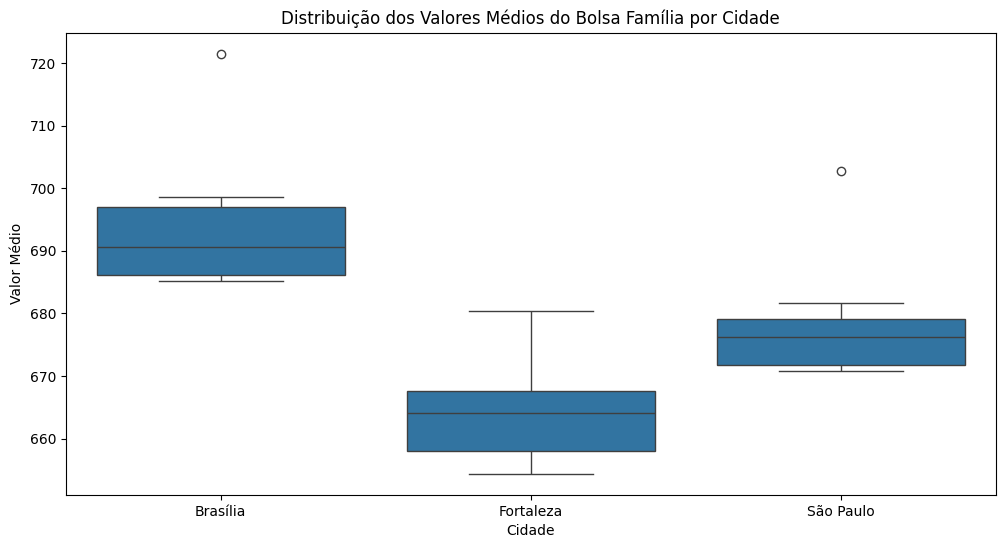

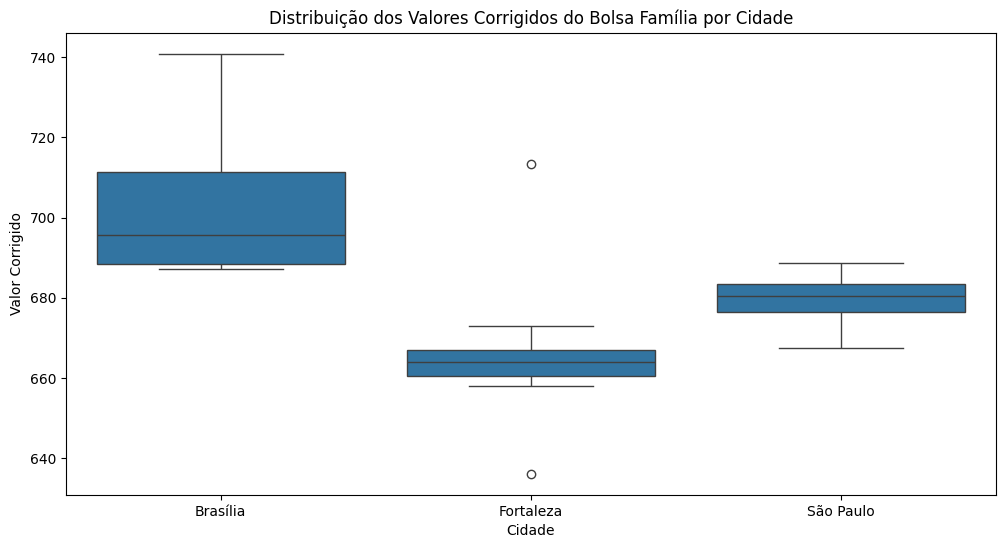

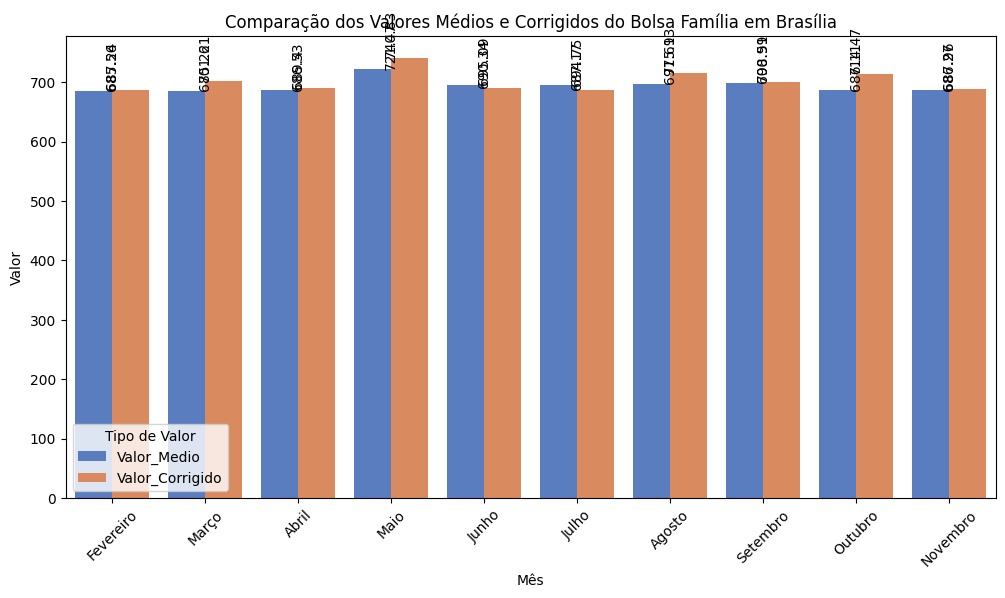

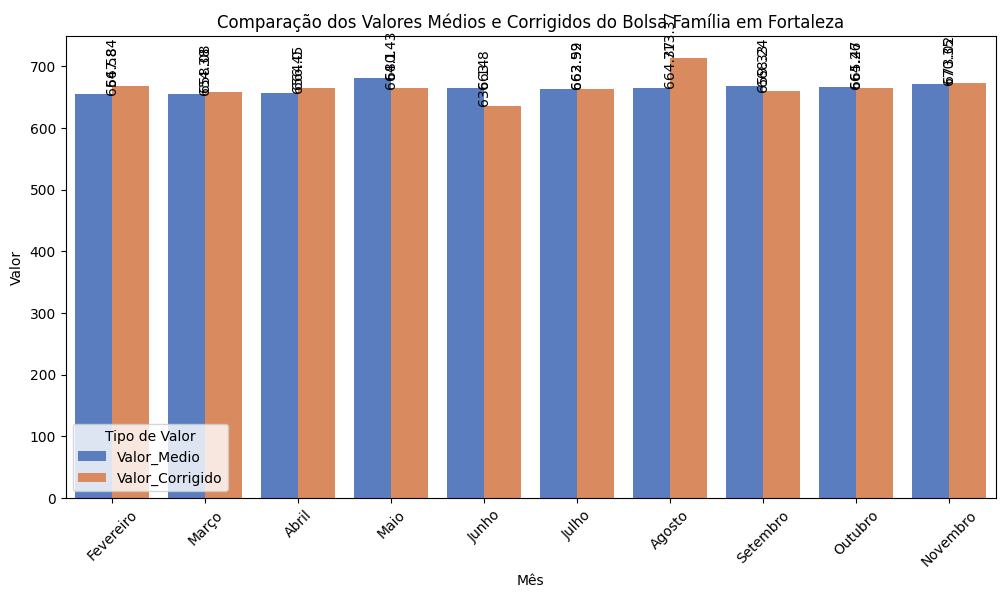

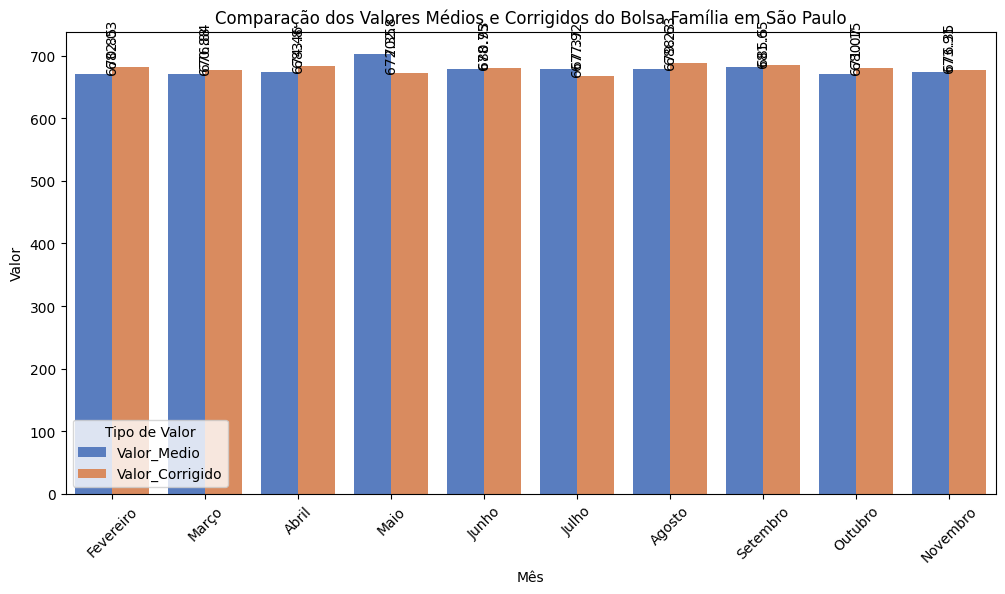

In [25]:
# Resultados Gráficos:

# Visualização da variação do INPC
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Mês', y='INPC', hue='Cidade', marker='o')
plt.title('Variação Mensal do INPC por Cidade')
plt.xlabel('Mês')
plt.ylabel('Variação do INPC (%)')
plt.legend(title='Cidade')
plt.xticks(rotation=45)

# Rótulos:
for i in range(df.shape[0]):
    plt.text(df['Mês'][i], df['INPC'][i], round(df['INPC'][i], 2), 
             horizontalalignment='right', size='small', color='black')
plt.savefig('inpc.png', dpi=600)
plt.show()

# Visualização dos valores médios
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cidade', y='Valor_Medio', data=df)
plt.title('Distribuição dos Valores Médios do Bolsa Família por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Valor Médio')

plt.savefig('valormedio.png', dpi=600)
plt.show()

# Visualização dos valores corrigidos
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cidade', y='Valor_Corrigido', data=df)
plt.title('Distribuição dos Valores Corrigidos do Bolsa Família por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Valor Corrigido')

plt.savefig('valorcorrigido.png', dpi=600)
plt.show()

# Comparação dos valores corrigidos com os valores mensais por cidade
cidades = df['Cidade'].unique()

for cidade in cidades:
    plt.figure(figsize=(12, 6))
    df_cidade = df[df['Cidade'] == cidade]
    df_cidade_melted = df_cidade.melt(id_vars=['Mês'], value_vars=['Valor_Medio', 'Valor_Corrigido'], 
                                      var_name='Tipo_Valor', value_name='Valor')
    sns.barplot(x='Mês', y='Valor', hue='Tipo_Valor', data=df_cidade_melted, palette='muted')
    plt.title(f'Comparação dos Valores Médios e Corrigidos do Bolsa Família em {cidade}')
    plt.xlabel('Mês')
    plt.ylabel('Valor')
    plt.legend(title='Tipo de Valor')
    plt.xticks(rotation=45)

    # Adicionar rótulos aos valores
    for index, row in df_cidade_melted.iterrows():
        plt.text(row.name % 10, row['Valor'], round(row['Valor'], 2), ha='center', rotation=90, va='bottom')

    plt.savefig(f'comparacao_valores_{cidade}.png', dpi=600)
    plt.show()


In [26]:
#Visualização dos dados finais:
display(df)
df.to_excel('resultado.xlsx', index=False)

,Cidade,Mês,Valor_Medio,INPC,Valor_Corrigido
0,Brasília,Fevereiro,685.56,0.24,687.24
1,Brasília,Março,685.22,2.39,701.61
2,Brasília,Abril,686.53,0.42,689.40
3,Brasília,Maio,721.47,2.68,740.83
4,Brasília,Junho,695.09,-0.68,690.34
5,Brasília,Julho,694.75,-1.09,687.17
6,Brasília,Agosto,697.69,2.50,715.13
7,Brasília,Setembro,698.51,0.35,700.99
8,Brasília,Outubro,686.11,4.13,714.47
9,Brasília,Novembro,686.27,0.25,687.96


#### Teste Diff - A/B

O teste limita por duas cidades mas é possivel ter ideias


In [27]:
#Tratamento dos Dados

# Criar DataFrame
df1 = pd.DataFrame(data)

# Calcular a variação do INPC de um mês para outro
df1['INPC_Variacao'] = df1.groupby('Cidade')['INPC'].diff()

# Converter INPC para fator de correção
df1['INPC_Corrigido'] = 1 + (df1['INPC'] / 100)

# Calcular o INPC acumulado
df1['INPC_Acumulado'] = df1.groupby('Cidade')['INPC_Corrigido'].cumprod()

# Calcular o valor corrigido pelo INPC acumulado
df1['Valor_Corrigido'] = df1['Valor_Medio'] / df1['INPC_Acumulado']

# Estatísticas descritivas
estatisticas_descritivas = df1.groupby('Cidade')[['Valor_Medio', 'INPC', 'Valor_Corrigido']].describe()



In [28]:
# Teste A/B (t-test) entre Brasília e Fortaleza
t_test_brasilia_fortaleza = stats.ttest_ind(
    df1[df1['Cidade'] == 'Brasília']['Valor_Medio'],
    df1[df1['Cidade'] == 'Fortaleza']['Valor_Medio']
)

# Teste A/B (t-test) entre Brasília e São Paulo
t_test_brasilia_sao_paulo = stats.ttest_ind(
    df1[df1['Cidade'] == 'Brasília']['Valor_Medio'],
    df1[df1['Cidade'] == 'São Paulo']['Valor_Medio']
)

# Teste A/B (t-test) entre Fortaleza e São Paulo
t_test_fortaleza_sao_paulo = stats.ttest_ind(
    df1[df1['Cidade'] == 'Fortaleza']['Valor_Medio'],
    df1[df1['Cidade'] == 'São Paulo']['Valor_Medio']
)

In [29]:
# Exibir estatísticas descritivas e resultados dos testes
display("Estatísticas Descritivas:")
display(estatisticas_descritivas)
display("Resultado do Teste A/B entre Brasília e Fortaleza:", t_test_brasilia_fortaleza)
display("Resultado do Teste A/B entre Brasília e São Paulo:", t_test_brasilia_sao_paulo)
display("Resultado do Teste A/B entre Fortaleza e São Paulo:", t_test_fortaleza_sao_paulo)

'Estatísticas Descritivas:'

Valor_Medio                                                 \
                count     mean        std     min       25%      50%   
Cidade                                                                 
Brasília         10.0  693.720  11.133790  685.22  686.1500  690.640   
Fortaleza        10.0  664.099   7.957767  654.38  658.0675  664.085   
São Paulo        10.0  678.152   9.482819  670.85  671.7800  676.190   

                             INPC         ...               Valor_Corrigido  \
                75%     max count   mean  ...     75%   max           count   
Cidade                                    ...                                 
Brasília   697.0400  721.47  10.0  1.119  ...  2.4725  4.13            10.0   
Fortaleza  667.5475  680.43  10.0  0.391  ...  1.0050  7.38            10.0   
São Paulo  679.1100  702.80  10.0  0.139  ...  1.3725  1.67            10.0   

                                                                      \
                 mean        std         min         25%         50%   
Cidade                                                                 
Brasília   656.779841  23.915612  614.768960  653.584623  663.701832   
Fortaleza  652.772561  19.176781  632.469269  638.683114  646.266472   
São Paulo  674.977244  18.940692  648.579124  661.181717  675.044642   

                                   
                  75%         max  
Cidade                             
Brasília   668.102533  683.918595  
Fortaleza  666.032253  683.791532  
São Paulo  685.938451  706.419610  

[3 rows x 24 columns]

'Resultado do Teste A/B entre Brasília e Fortaleza:'

TtestResult(statistic=np.float64(6.844559473850607), pvalue=np.float64(2.095318672816685e-06), df=np.float64(18.0))

'Resultado do Teste A/B entre Brasília e São Paulo:'

TtestResult(statistic=np.float64(3.366220073641527), pvalue=np.float64(0.0034392992021037316), df=np.float64(18.0))

'Resultado do Teste A/B entre Fortaleza e São Paulo:'

TtestResult(statistic=np.float64(-3.589789002494135), pvalue=np.float64(0.002094228146101543), df=np.float64(18.0))